Largest percentage drop in asset price over a specified time period (distance between peak and through in the line curve of the asset)

Investments with longer backtesting period will likely have larger max drawdown and therefore caution must be applied in comparing across strategies.

Calmar Ratio is the ratio of CAGR and Max drawdown and it's a measure of risk adjusted return.
                CALMAR RATIO = Compounded Annaul Return / Maximun Drawdown

In [18]:
import yfinance as yf
import numpy as np
import pandas as pd

In [19]:
tickers = ["AMZN", "GOOG", "META"]
ohlcv_data = {}

In [20]:
for ticker in tickers:
    temp =  yf.download(ticker, period = '7mo', interval = '1d')
    temp.dropna(how = 'any', inplace = True)
    ohlcv_data[ticker] = temp

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [21]:
def CAGR(DF):
    df = DF.copy()
    df["return"] = df["Adj Close"].pct_change()
    df["cum_return"] = (1 + df["return"]).cumprod()
    n = len(df)/252
    CAGR = (df["cum_return"][-1])**(1/n) - 1
    return CAGR

In [22]:
def max_dd(DF):
    df = DF.copy()
    df["return"] = df["Adj Close"].pct_change()
    df["cum_return"] = (1+df["return"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]   
    return (df["drawdown"]/df["cum_roll_max"]).max()

In [ ]:
def calmar(DF):
    df = DF.copy()
    return CAGR(df)/max_dd(DF)
    

In [26]:
for ticker in ohlcv_data:
    print("max drawdown of {} = {}".format(ticker,max_dd(ohlcv_data[ticker])))
    print("calmar ratio of {} = {}".format(ticker, calmar(ohlcv_data[ticker])))

max drawdown of AMZN = 0.108595169648021
calmar ratio of AMZN = 7.2520529499383075
max drawdown of GOOG = 0.08631069188842268
calmar ratio of GOOG = 10.861055124252893
max drawdown of META = 0.12974686481776612
calmar ratio of META = 13.030760610605167


C:\Users\IVAN\AppData\Local\Temp\ipykernel_14068\667503414.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  CAGR = (df["cum_return"][-1])**(1/n) - 1
C:\Users\IVAN\AppData\Local\Temp\ipykernel_14068\667503414.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  CAGR = (df["cum_return"][-1])**(1/n) - 1
C:\Users\IVAN\AppData\Local\Temp\ipykernel_14068\667503414.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  CAGR = (df["cum_retur

<Axes: xlabel='Date'>

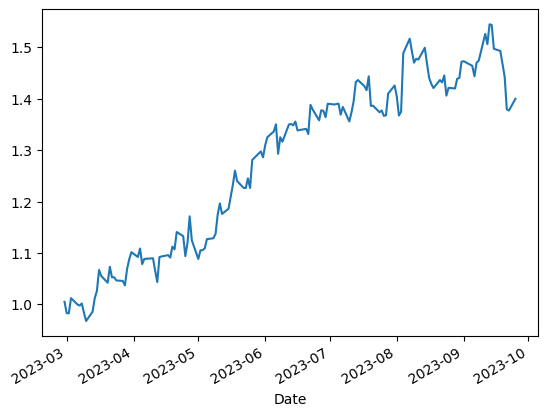

In [24]:
df["cum_return"].plot()